# Model Inference Playground

This playground provides code to run inference for different object detection models on sample images and videos. You can select a model, configure the required parameters, and run the code to do inference on a sample image. The playground includes:

- **Baseline model (Deformable-DETR)**: The baseline model
- **TransVOD++**:  Video Detection model built on top of the Deformable-DETR model.
- **Fusion Modules**: Various fusion modules (LateFusion, Backbone_CrossFusion, Encoder_CrossFusion) for both single frame and video scenarios

## Arguments

- **model_path**: Path to the model checkpoint.
- **image_path**: Path to the image or folder. Use `num_images_to_show` to show how many images are displayed when a folder path is given.
- **depth_path**: (Optional) Path to the depth image (required for depth-based models).
- **dataset_file**: Either 'vid_single' (single image) or 'vid_multi_plusplus' (for TransVOD++).
- **dilation**: Enables dilated convolutions in the model. All models uses dilation.
- **with_box_refine**: Whether to refine box coordinates during inference. All models uses box refine.
- **keep_prob**: Sets the confidence threshold for displaying boxes. 0.1 is used for all models.
- **num_classes**: Defines the number of classes in the dataset (3 for hand detection: temporary-0, hand-1, no object-2).
- **num_feature_levels**: Number of feature levels (set to 1 for single-scale models).
- **device**: 'cuda' or 'cpu', depending on the system.
- **num_images_to_show**: Number of images to display when inferring on a folder.
- **show_fig**: Whether to display the output images. Useful for rendering in the notebook.
- **img_max_size**: Maximum width of the image. 1000 is set as default for all inference.
- **use_depth**: If True, uses depth information during inference (for depth deformable models).
- **fusion_type**: Type of fusion applied (LateFusion, Backbone_CrossFusion, Encoder_CrossFusion).
- **dformer_backbone**: Uses DFormer depth backbone as the depth backbone.

---

### **Baseline Model (Deformable-DETR)**

Not using distributed mode
git:
  sha: 144f15348a69b37399bc3a77436e94c9f789decf, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=1, bbox_loss_coef=5, cache_mode=False, clip_max_norm=0.1, close_fig=False, cls_loss_coef=2, coco_panoptic_path=None, coco_path='./data/coco', coco_pretrain=False, dataset_file='vid_single', dec_layers=6, dec_n_points=4, depth_path=None, depth_type='Baseline_rgb', device='cuda:0', dformer_backbone=False, dformer_weights=None, dice_loss_coef=1, dilation=True, dim_feedforward=1024, distributed=False, dpth_n_points=4, dropout=0.1, enc_layers=6, enc_n_points=4, epochs=15, eval=True, filter_key_img=True, fixed_pretrained_model=False, focal_alpha=0.25, frozen_weights=None, fusion_type='Baseline', giou_loss_coef=2, hidden_dim=256, img_max_size=1000, img_no=0, img_path='sample_dataset/HandPose_test/images/00027.jpg', inference_coco_path='', interval1=20, interval2=60, keep_prob=0.1, lr=0.0002, lr_backbone=2e-05, l

100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Processing image . took 0.37s


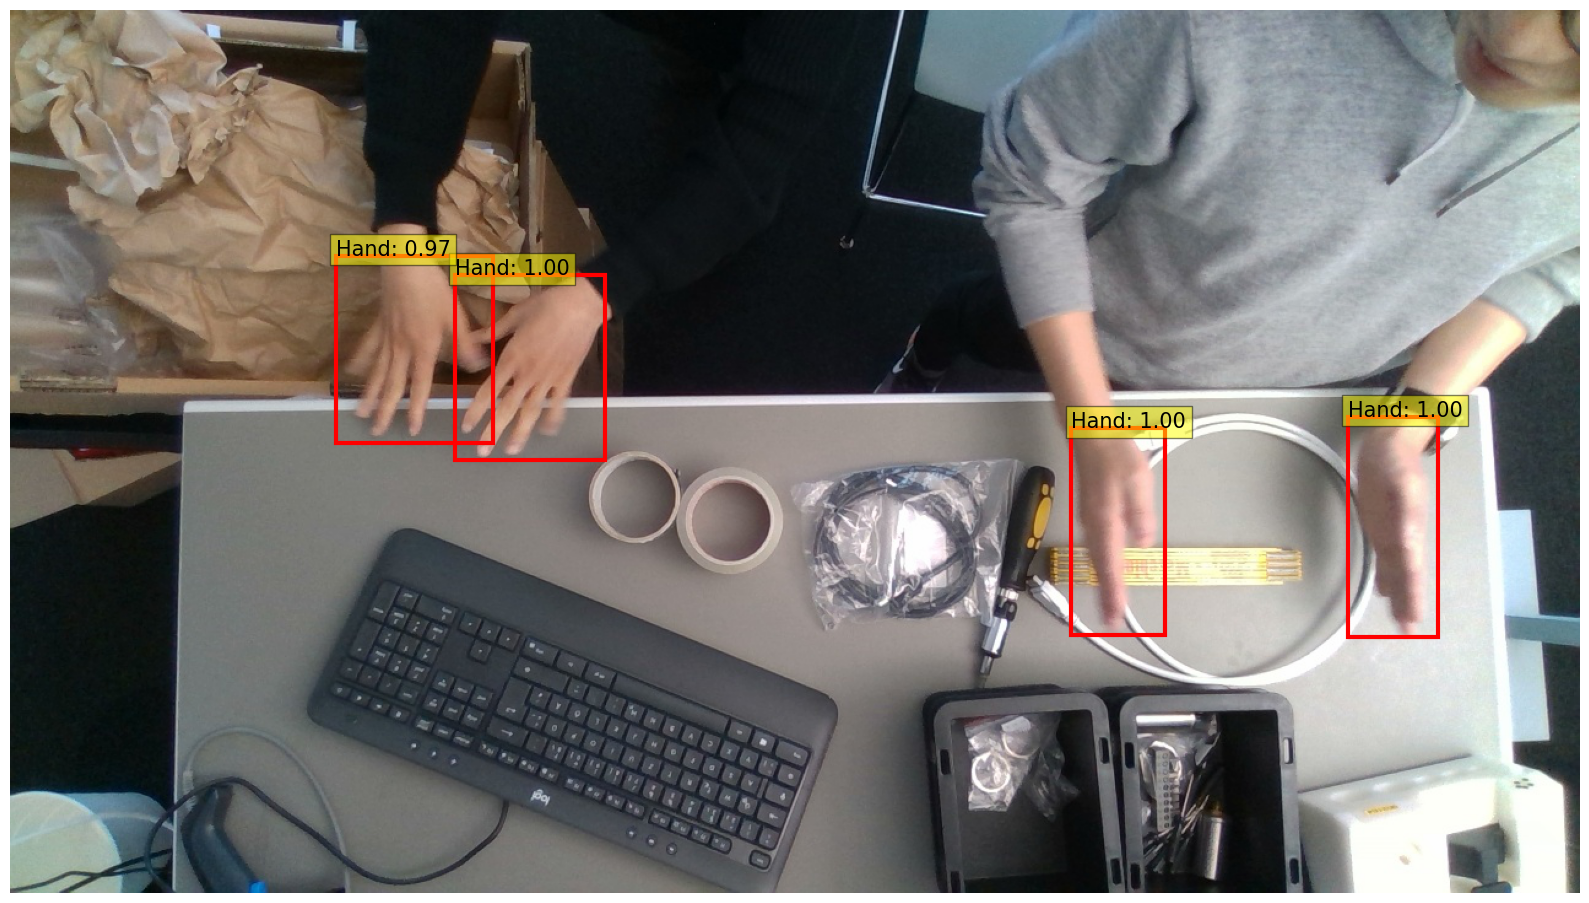

In [5]:
from inference import run_inference

device = "cuda:0" # select the device

img_path = "sample_dataset/HandPose_test/images/00027.jpg" # Select the image path
model_path = f'model_weights/finetuned_models/baseline/checkpoint.pth' # Select the model path

# Modify to match the baseline structure with depth deform latefusion
figs, outputs = run_inference(
    model_path=model_path, 
    img_path=img_path, 
    dataset_file='vid_single', # vid_single referes to single image
    dilation=True,  
    with_box_refine=True,
    keep_prob=0.1, # boxes only above this confidence score is shown
    num_classes=3, 
    num_feature_levels=1, 
    device=device,
    show_fig=True, 
    img_max_size=1000,
)

---

### **Fusion Methods for single frame**

Not using distributed mode
git:
  sha: 144f15348a69b37399bc3a77436e94c9f789decf, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=1, bbox_loss_coef=5, cache_mode=False, clip_max_norm=0.1, close_fig=False, cls_loss_coef=2, coco_panoptic_path=None, coco_path='./data/coco', coco_pretrain=False, dataset_file='vid_single', dec_layers=6, dec_n_points=4, depth_path='sample_dataset/HandPose_test/depth/00027.jpg', depth_type='Baseline_rgb', device='cuda:2', dformer_backbone=True, dformer_weights=None, dice_loss_coef=1, dilation=True, dim_feedforward=1024, distributed=False, dpth_n_points=4, dropout=0.1, enc_layers=6, enc_n_points=4, epochs=15, eval=True, filter_key_img=True, fixed_pretrained_model=False, focal_alpha=0.25, frozen_weights=None, fusion_type='LateFusion', giou_loss_coef=2, hidden_dim=256, img_max_size=1000, img_no=0, img_path='sample_dataset/HandPose_test/images/00027.jpg', inference_coco_path='', interval1=20, interval2=60, kee

  0%|          | 0/1 [00:00<?, ?it/s]

Processing image . took 0.05s


100%|██████████| 1/1 [00:00<00:00,  4.65it/s]


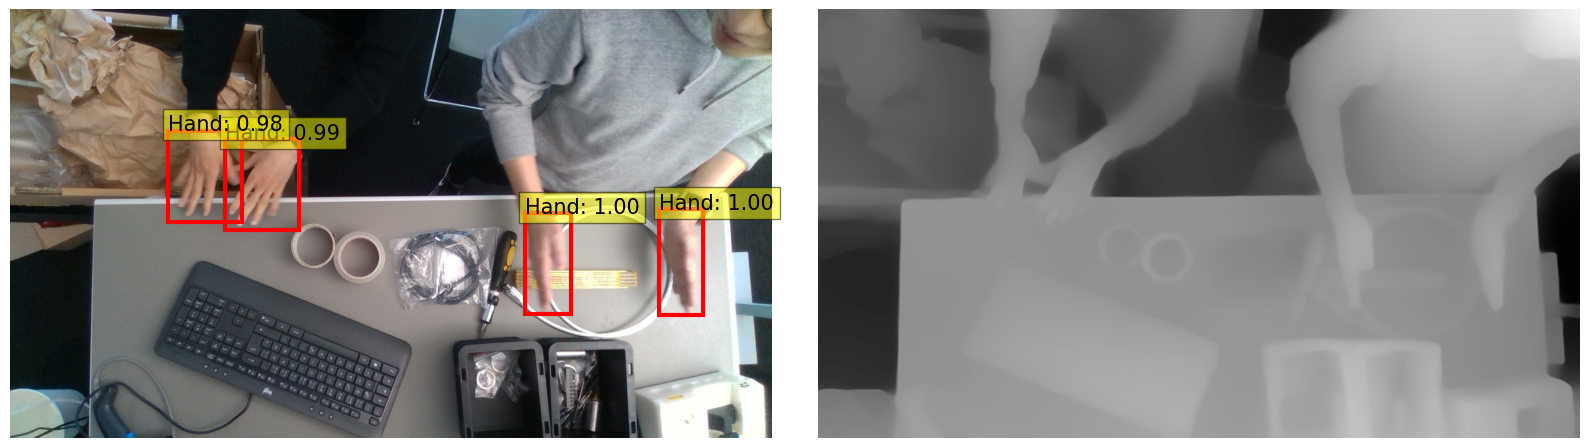

In [2]:
from inference import run_inference

device = "cuda:0" # select the device

fusion_types = ["LateFusion", "Backbone_CrossFusion", "Encoder_CrossFusion"] # just for reference, not an argument 
fusion_type = fusion_types[0] # select the fusion type [0,1,2]

img_path = "sample_dataset/HandPose_test/images/00027.jpg" # Select the image path
depth_path = "sample_dataset/HandPose_test/depth/00027.jpg" # Select the image path
model_paths = {"LateFusion": "latefusion/checkpoint_v1.pth", 
               "Backbone_CrossFusion": "backbone_crossfusion/checkpoint.pth", 
               "Encoder_CrossFusion": "encoder_crossfusion/checkpoint.pth"} 
model_path = f'model_weights/finetuned_models/{model_paths[fusion_type]}' # Select the model path

# Modify to match the baseline structure with depth deform latefusion
figs, outputs = run_inference(
    model_path=model_path, 
    img_path=img_path, 
    depth_path=depth_path,
    dataset_file='vid_single', # vid_single referes to single image
    dilation=True,  
    with_box_refine=True,
    keep_prob=0.1, # boxes only above this confidence score is shown
    num_classes=3, 
    num_feature_levels=1, 
    device=device,
    show_fig=True, 
    img_max_size=1000,
    use_depth=True, 
    fusion_type = fusion_type,  # Keeping depth deform latefusion
    dformer_backbone=True  # Specific to depth deform latefusion
)

---

### **TransVOD++**

- This demo requires the coco file to work, which means it required the original dataset, The propretiary dataset is not included in this repo. It can belinked and can be used for inference. This code is just the template. 

In [4]:
from inference import run_inference

device = "cuda:0" # select the device

# Note: Add the coco path to the original annotations
coco_path="coco.json" # coco path should be included as it uses this to find the reference frames, Not included in this demo
img_path = "sample_dataset/HandPose_test/images/00027.jpg" # Select the image path
model_path = f'model_weights/finetuned_models/finetuned_models/transvod++/checkpoint.pth' # Select the model path

# Modify to match the baseline structure with depth deform latefusion
figs, outputs = run_inference(
    model_path=model_path, 
    coco_path=coco_path,
    img_path=img_path, 
    dataset_file='vid_multi_plusplus', # vid_multi_plusplus referes to TransVOD++
    dilation=True,  
    with_box_refine=True,
    keep_prob=0.1, # boxes only above this confidence score is shown
    num_classes=3, 
    num_feature_levels=1, 
    device=device,
    show_fig=True, 
    img_max_size=1000,
    num_ref_frames=4, # number of reference frames used for video object detection
)

---

### **TransVOD++ with Depth Fusion**

- Note this is a template, use the original coco file annotations for this demo

In [ ]:
from inference import run_inference

device = "cuda:0" # select the device

fusion_types = ["LateFusion", "Backbone_CrossFusion", "Encoder_CrossFusion"] # just for reference, not an argument 
fusion_type = fusion_types[0] # select the fusion type [0,1,2]

# Note: Add the coco path to the original annotations
coco_path="coco.json" # coco path should be included as it uses this to find the reference frames, Not included in this demo
img_path = "sample_dataset/HandPose_test/images/00027.jpg" # Select the image path
depth_path = "sample_dataset/HandPose_test/depth/00027.jpg" # Select the image path

# The model here is Spatial weights with fusion module + Already trained temporal weights
model_path = f'model_weights/finetuned_models/finetuned_models/transvod++/checkpoint.pth' # Select the model path
spatial_weights = {"LateFusion": "latefusion/checkpoint_v1.pth", 
               "Backbone_CrossFusion": "backbone_crossfusion/checkpoint.pth", 
               "Encoder_CrossFusion": "encoder_crossfusion/checkpoint.pth"} 
spatial_weights = f'model_weights/finetuned_models/{model_paths[fusion_type]}' # Select the model path

# Modify to match the baseline structure with depth deform latefusion
figs, outputs = run_inference(
    model_path=model_path, 
    spatial_weights = spatial_weights, 
    coco_path=coco_path,
    img_path=img_path, 
    depth_path=depth_path,
    dataset_file='vid_multi_plusplus', # vid_multi referes to TransVOD++
    dilation=True,  
    with_box_refine=True,
    keep_prob=0.1, # boxes only above this confidence score is shown
    num_classes=3, 
    num_feature_levels=1, 
    device=device,
    show_fig=True, 
    img_max_size=1000,
    use_depth=True, 
    fusion_type = fusion_type,  # Keeping depth deform latefusion
    dformer_backbone=True  # Specific to depth deform latefusion
)